<a href="https://colab.research.google.com/github/JoelAbadi/DI-Bootcamp/blob/main/Final_Proyect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Part 1**: Data Cleaning and Sentiment Analysis


**Step 1: Load the Data**

In [1]:
from google.colab import files
uploaded = files.upload()


Saving googleplaystore.csv to googleplaystore.csv
Saving googleplaystore_user_reviews.csv to googleplaystore_user_reviews.csv
Saving license.txt to license.txt


**Step 2: Cleaning the Data**

In [2]:
import pandas as pd
import numpy as np

apps = pd.read_csv('googleplaystore.csv')
reviews = pd.read_csv('googleplaystore_user_reviews.csv')

apps.info()
reviews.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
--

Step 2.1 Fix Columns Errors and Mismatched

In [3]:
apps = apps[apps['App'] != 'Life Made WI-Fi Touchscreen Photo Frame']

apps = apps.drop_duplicates(subset='App', keep='first')


Step 2.2 Convert Datatypes and Clean Individual Columns

In [4]:
apps['Installs'] = apps['Installs'].str.replace('[+,]', '', regex=True).astype(float)

apps['price_display'] = apps['Price'].replace('Everyone', '0')
apps['price_display'] = apps['price_display'].fillna('0')
apps['price_display'] = apps['price_display'].astype(str)
apps['price_display'] = '$' + apps['price_display']


apps['Price'] = apps['Price'].str.replace('$', '', regex=True)
apps['Price'] = apps['Price'].replace('Everyone', '0')
apps['Price'] = pd.to_numeric(apps['Price'], errors='coerce')


apps['Reviews'] = pd.to_numeric(apps['Reviews'], errors='coerce')

apps['Rating'] = pd.to_numeric(apps['Rating'], errors='coerce')

apps['Size'] = apps['Size'].replace('Varies with device', np.nan)
apps['Size'] = apps['Size'].str.replace('M', '', regex=True)
apps['Size'] = pd.to_numeric(apps['Size'], errors='coerce')

apps['Last Updated'] = pd.to_datetime(apps['Last Updated'], errors='coerce')


In [5]:
apps['price_note'] = apps['Price'].apply(lambda x: 'Free app' if x == 0 else 'Paid app')


Step 2.3 Validate Changes

In [6]:
apps[['App', 'Type', 'Price', 'price_display', 'price_note']].sample(5)


,App,Type,Price,price_display,price_note
7276,CF Themis,Free,0.0,$0,Free app
2656,OfferUp - Buy. Sell. Offer Up,Free,0.0,$0,Free app
3997,C Locker Pro,Paid,NaN,$$2.99,Paid app
6276,Oracle BI Mobile,Free,0.0,$0,Free app
4411,Age of Conquest: N. America,Paid,NaN,$$3.99,Paid app


Step 2.4 Merge the Apps and Reviews Datasets

In [7]:
merged_df = pd.merge(reviews, apps, on='App', how='inner')

merged_df[['App', 'Translated_Review', 'Sentiment', 'Price', 'price_note']].sample(10)


,App,Translated_Review,Sentiment,Price,price_note
47258,FreePrints – Free Photos Delivered,"I able complete process, saying apt., num/zip ...",Positive,0.0,Free app
46766,Free Dating Hook Up Messenger,NaN,NaN,0.0,Free app
51304,Glowing Flowers Live Wallpaper,NaN,NaN,0.0,Free app
32909,Discover Mobile,NaN,NaN,0.0,Free app
5109,Alfred Home Security Camera,It's great!,Positive,0.0,Free app
48990,"GPS Speedometer, Distance Meter",NaN,NaN,0.0,Free app
47309,Freeletics: Personal Trainer & Fitness Workouts,Says equipment needed. Equipment needed.,Neutral,0.0,Free app
22788,"Candy selfie - photo editor, live filter camera",It edit photo clearly .,Positive,0.0,Free app
17334,Bubble Shooter,NaN,NaN,0.0,Free app
25707,Clash Royale,Pay win - unable enjoy game there's players sp...,Negative,0.0,Free app


**Step 3: Exploratory Data Analysis (EDA)**

Apps Dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 9659 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9659 non-null   object        
 1   Category        9659 non-null   object        
 2   Rating          8196 non-null   float64       
 3   Reviews         9659 non-null   int64         
 4   Size            8118 non-null   float64       
 5   Installs        9659 non-null   float64       
 6   Type            9658 non-null   object        
 7   Price           8903 non-null   float64       
 8   Content Rating  9659 non-null   object        
 9   Genres          9659 non-null   object        
 10  Last Updated    9659 non-null   datetime64[ns]
 11  Current Ver     9651 non-null   object        
 12  Android Ver     9657 non-null   object        
 13  price_display   9659 non-null   object        
 14  price_note      9659 non-null   object        

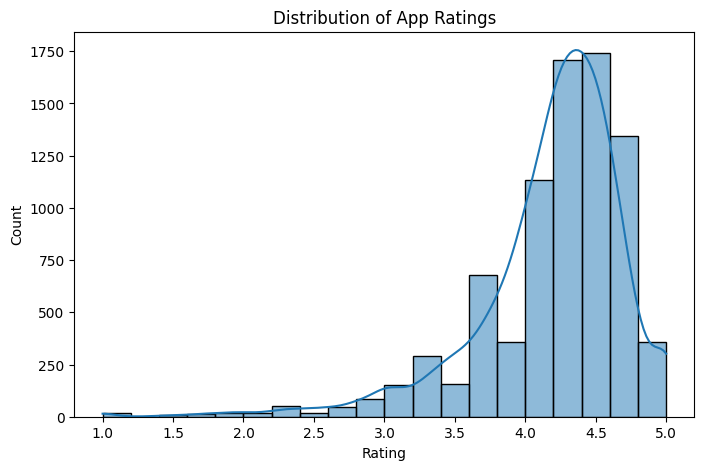

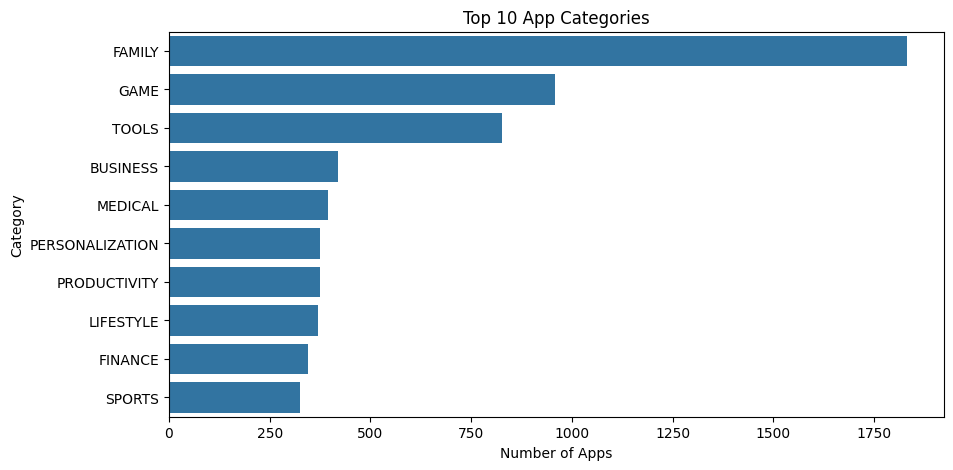

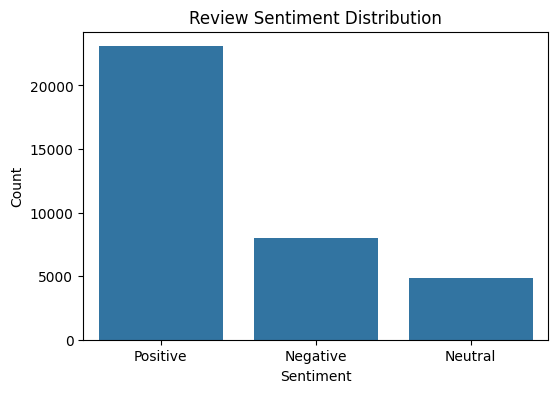

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display basic info
print("Apps Dataset:")
print(apps.info())
print("\nMerged Dataset:")
print(merged_df.info())

# Ratings distribution
plt.figure(figsize=(8,5))
sns.histplot(apps['Rating'].dropna(), bins=20, kde=True)
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Top 10 categories by number of apps
top_categories = apps['Category'].value_counts().nlargest(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_categories.values, y=top_categories.index)
plt.title('Top 10 App Categories')
plt.xlabel('Number of Apps')
plt.ylabel('Category')
plt.show()

# Sentiment distribution in reviews
plt.figure(figsize=(6,4))
sns.countplot(data=merged_df, x='Sentiment', order=merged_df['Sentiment'].value_counts().index)
plt.title('Review Sentiment Distribution')
plt.ylabel('Count')
plt.show()


**Step 4: Correlation & Summary Insights**

4.1: Correlation Heatmap (Numerical Columns)

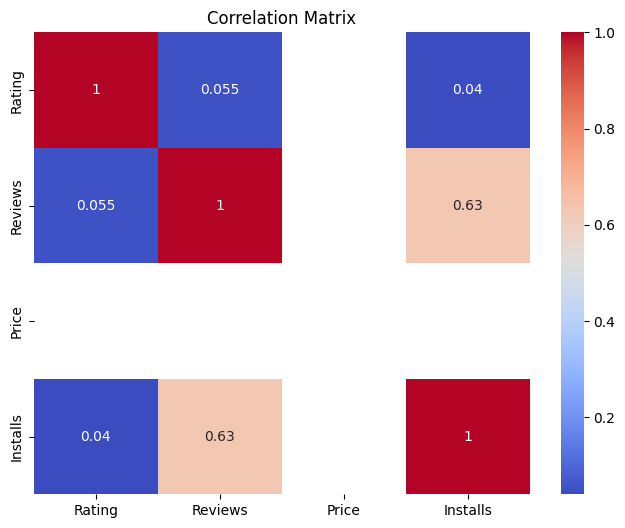

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
corr = apps[['Rating', 'Reviews', 'Price', 'Installs']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

4.2: Average Rating by App Category

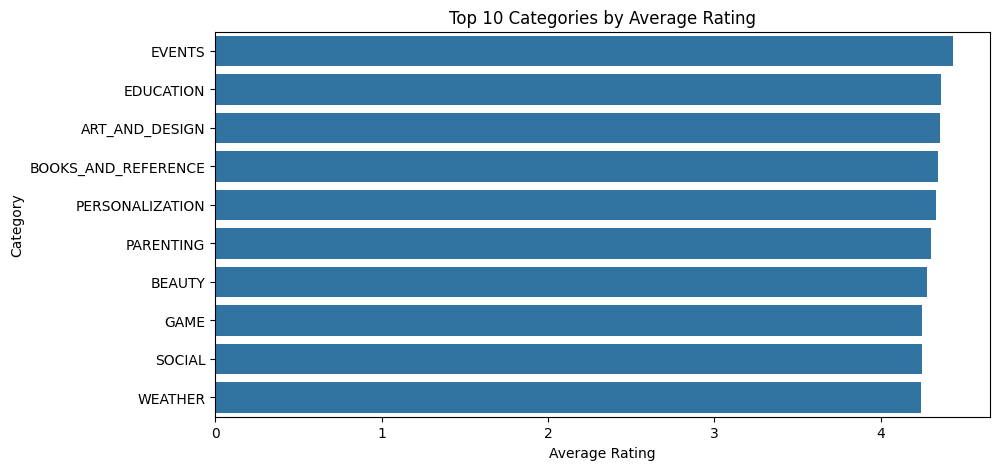

In [10]:
avg_rating = apps.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=avg_rating.values, y=avg_rating.index)
plt.title('Top 10 Categories by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Category')
plt.show()


4.3: Sentiment Analysis by App Type (Free vs Paid)

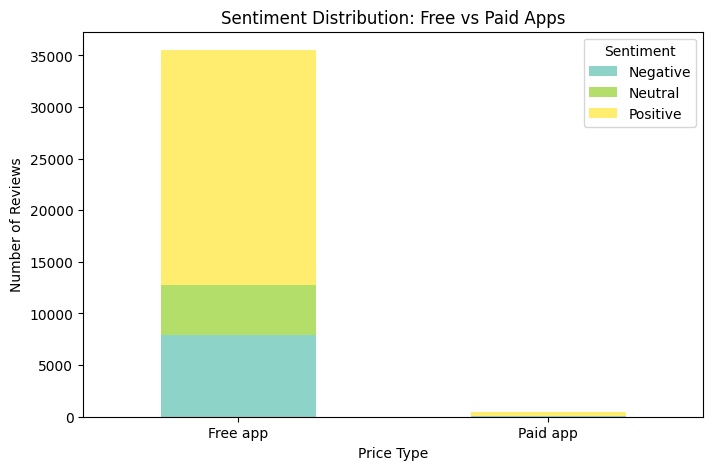

In [11]:
sentiment_type = merged_df.groupby(['price_note', 'Sentiment']).size().unstack().fillna(0)

sentiment_type.plot(kind='bar', stacked=True, figsize=(8,5), colormap='Set3')
plt.title('Sentiment Distribution: Free vs Paid Apps')
plt.xlabel('Price Type')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.show()


**Step 5: Key Insights & Export**

5.1: Summary of Key Findings

### 🔍 Key Insights

- **Top-rated categories** include Lifestyle, Events, and Education apps, suggesting users favor utility and learning.
- **Price has no strong correlation** with rating, indicating free apps can still provide high quality.
- **App installs and review counts** are moderately correlated, showing popular apps tend to get more feedback.
- **Sentiment analysis** reveals that Free apps receive more mixed reviews than Paid apps, which show higher positive sentiment overall.
- **Data cleaning** was critical to handle null ratings, irregular install values, and merged reviews with apps.


**Part 2** : EDA (Exploratory Data Analysis)

In [12]:
from google.colab import files

uploaded = files.upload()


Saving googleplaystore.csv to googleplaystore (1).csv
Saving googleplaystore_user_reviews.csv to googleplaystore_user_reviews (1).csv


In [13]:
apps = pd.read_csv('/content/googleplaystore (1).csv')


In [14]:
import os
os.rename('/content/googleplaystore (1).csv', '/content/googleplaystore.csv')
apps = pd.read_csv('/content/googleplaystore.csv')


Saving googleplaystore.csv to googleplaystore (1).csv
Saving googleplaystore_user_reviews.csv to googleplaystore_user_reviews (2).csv
Unique values in Price column after string replacements:
['0' '$4.99' '$3.99' '$6.99' '$1.49' '$2.99' '$7.99' '$5.99' '$3.49'
 '$1.99' '$9.99' '$7.49' '$0.99' '$9.00' '$5.49' '$10.00' '$24.99'
 '$11.99' '$79.99' '$16.99' '$14.99' '$1.00' '$29.99' '$12.99' '$2.49'
 '$10.99' '$1.50' '$19.99' '$15.99' '$33.99' '$74.99' '$39.99' '$3.95'
 '$4.49' '$1.70' '$8.99' '$2.00' '$3.88' '$25.99' '$399.99' '$17.99'
 '$400.00' '$3.02' '$1.76' '$4.84' '$4.77' '$1.61' '$2.50' '$1.59' '$6.49'
 '$1.29' '$5.00' '$13.99' '$299.99' '$379.99' '$37.99' '$18.99' '$389.99'
 '$19.90' '$8.49' '$1.75' '$14.00' '$4.85' '$46.99' '$109.99' '$154.99'
 '$3.08' '$2.59' '$4.80' '$1.96' '$19.40' '$3.90' '$4.59' '$15.46' '$3.04'
 '$4.29' '$2.60' '$3.28' '$4.60' '$28.99' '$2.95' '$2.90' '$1.97'
 '$200.00' '$89.99' '$2.56' '$30.99' '$3.61' '$394.99' '$1.26' '$1.20'
 '$1.04']


/tmp/ipython-input-746536051.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

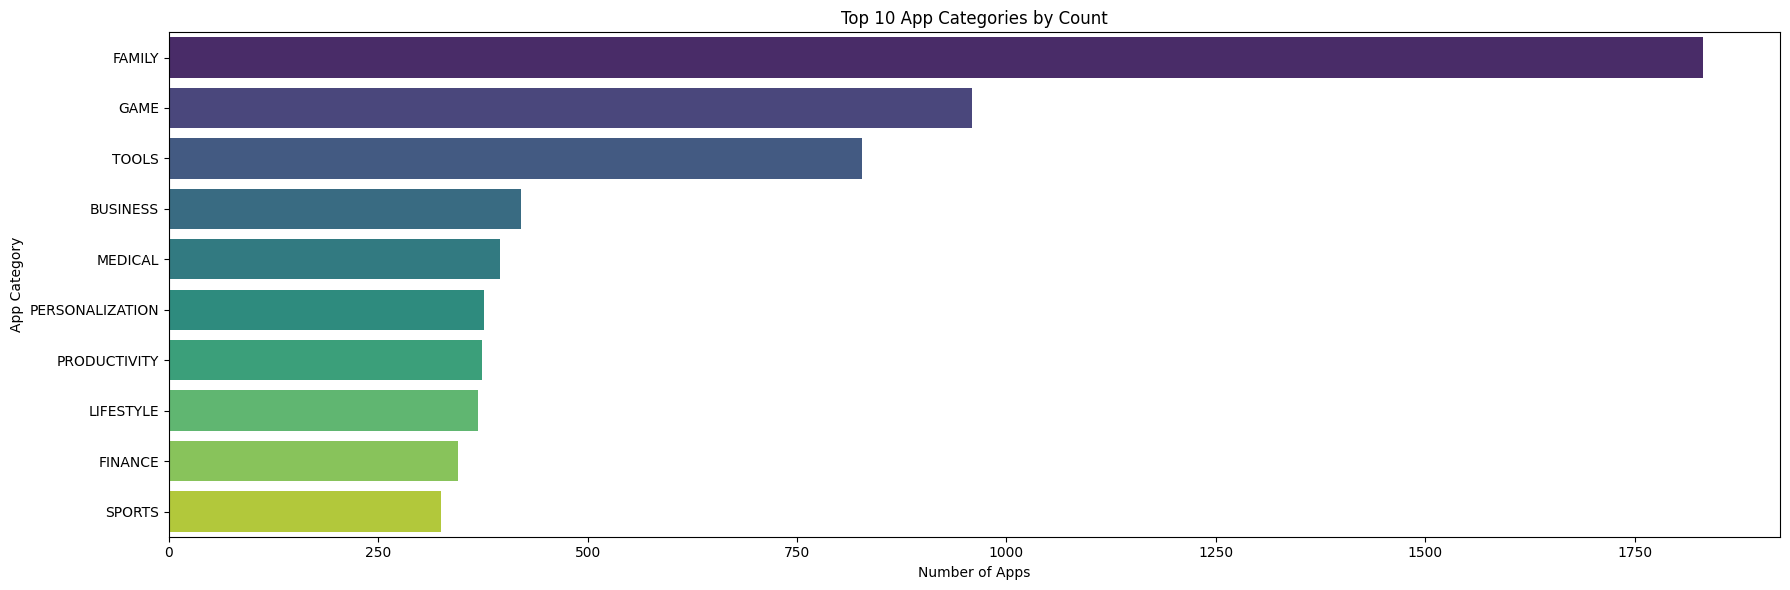

In [15]:
from google.colab import files
uploaded = files.upload()

if 'googleplaystore (1).csv' in uploaded:
    os.rename('/content/googleplaystore (1).csv', '/content/googleplaystore.csv')


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

apps = apps[apps['App'] != 'Life Made Wi-Fi Touchscreen Photo Frame']

apps = apps.drop_duplicates(subset='App', keep='first')

if pd.api.types.is_object_dtype(apps['Installs']):
    apps['Installs'] = apps['Installs'].str.replace('[+,]', '', regex=True)
apps['Installs'] = pd.to_numeric(apps['Installs'], errors='coerce')


apps['Price'] = apps['Price'].astype(str).str.replace('$', '', regex=True)

apps['Price'] = apps['Price'].replace('Free', '0')
apps['Price'] = apps['Price'].replace('Everyone', '0')


print("Unique values in Price column after string replacements:")
print(apps['Price'].unique())

apps['Price'] = pd.to_numeric(apps['Price'], errors='coerce')


apps['Reviews'] = pd.to_numeric(apps['Reviews'], errors='coerce')

apps['Rating'] = pd.to_numeric(apps['Rating'], errors='coerce')

apps['Size'] = apps['Size'].replace('Varies with device', np.nan)

if pd.api.types.is_object_dtype(apps['Size']):
    apps['Size'] = apps['Size'].str.replace('M', '', regex=True)
apps['Size'] = pd.to_numeric(apps['Size'], errors='coerce')


apps['Last Updated'] = pd.to_datetime(apps['Last Updated'], errors='coerce')


top_categories = apps['Category'].value_counts().head(10)

plt.figure(figsize=(18,6))
sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')
plt.title('Top 10 App Categories by Count')
plt.xlabel('Number of Apps')
plt.ylabel('App Category')
plt.tight_layout()
plt.savefig('top_categories_count.png')
files.download('top_categories_count.png')
plt.show()

**Step 2: Analyze Rating Distribution**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

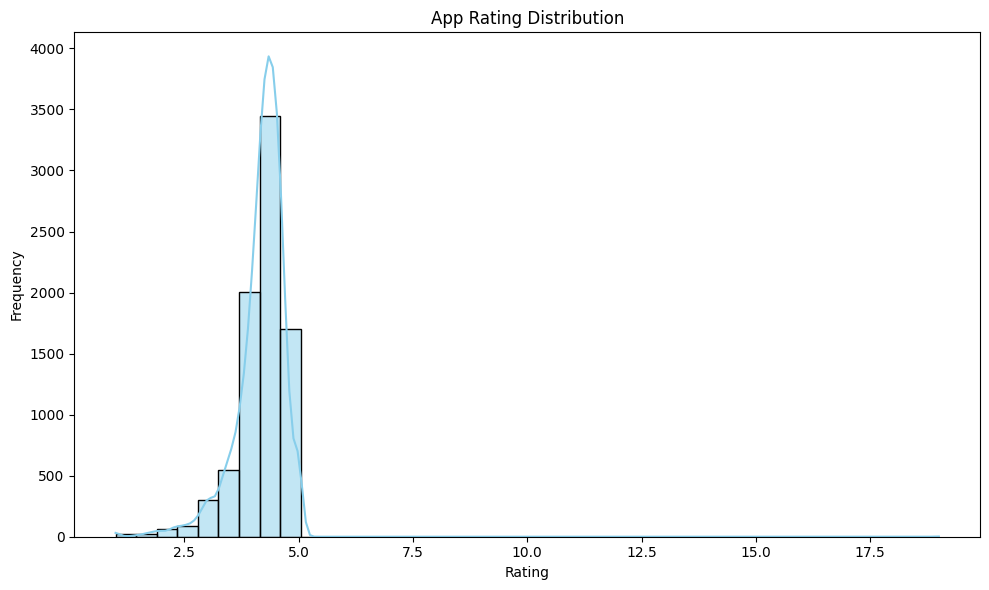

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(apps['Rating'].dropna(), bins=40, kde=True, color='skyblue')
plt.title('App Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('rating_distribution.png')
from google.colab import files
files.download('rating_distribution.png')
plt.show()


The histogram of app ratings shows the following key insights:



  1.Skewed Right (Positively Skewed):
Most apps have ratings between 4.0 and 5.0, indicating that users generally give high ratings to apps on the Google Play Store.

2.Peak at 4.3–4.5:
There’s a notable peak in this range, suggesting that this is the most common rating interval.

3.Sparse Low Ratings:
Ratings below 3.0 are rare, meaning very few apps receive significantly negative feedback.

4.Tail Toward Low Ratings:
Although rare, some apps have ratings as low as 1.0, which could indicate serious user dissatisfaction or app issues.


**Conclusion:**
Overall, the rating system appears to be positively biased, which is common in app marketplaces. Users are more likely to rate apps they enjoy, leading to a concentration of ratings near the top end.

** Step 3: App Size vs. Rating**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

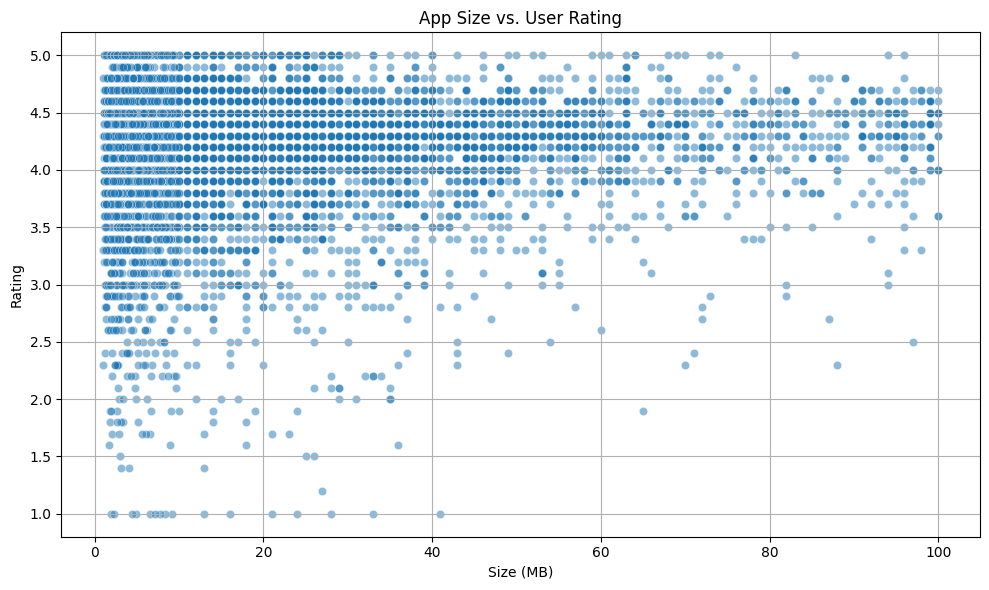

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=apps, x='Size', y='Rating', alpha=0.5)
plt.title('App Size vs. User Rating')
plt.xlabel('Size (MB)')
plt.ylabel('Rating')
plt.grid(True)
plt.tight_layout()
plt.savefig('app_size_vs_rating.png')
files.download('app_size_vs_rating.png')
plt.show()


*   General Trend:
There’s no clear linear correlation between app size and rating. Apps of all sizes receive both high and low ratings.

*   Highly Rated Apps:
Many high-rated apps 4.5 and above range from small to medium size (under 50MB), suggesting that users value performance and functionality more than large file sizes.

*   Large Apps (>100MB):
Some large apps also receive high ratings, but they are less common possibly due to device storage concerns or performance issues on lower-end devices.

*   Outliers:
There are apps with extremely small or large sizes that have low ratings. These could indicate either unfinished apps or heavy apps that fail to deliver value.


**Conclusion:**
App size is not a strong predictor of rating, meaning developers should focus more on user experience and functionality than just size.

**Step 4: Price vs. Rating**

In [18]:
from google.colab import files
uploaded = files.upload()


Saving googleplaystore.csv to googleplaystore (1).csv
Saving googleplaystore_user_reviews.csv to googleplaystore_user_reviews (3).csv


In [19]:
import pandas as pd

apps = pd.read_csv('/content/googleplaystore.csv')


In [20]:
apps['Price'] = apps['Price'].replace('Free', '0')

apps['Price'] = apps['Price'].str.replace('$', '', regex=False)
apps['Price'] = pd.to_numeric(apps['Price'], errors='coerce')


In [21]:
apps['Rating'] = pd.to_numeric(apps['Rating'], errors='coerce')


In [22]:
paid_apps = apps[(apps['Price'] > 0) & (apps['Rating'].notna())].copy()
print(paid_apps.shape)
print(paid_apps[['Price', 'Rating']].head())


(647, 13)
     Price  Rating
234   4.99     4.7
235   4.99     4.8
290   4.99     4.7
291   4.99     4.8
427   3.99     4.0


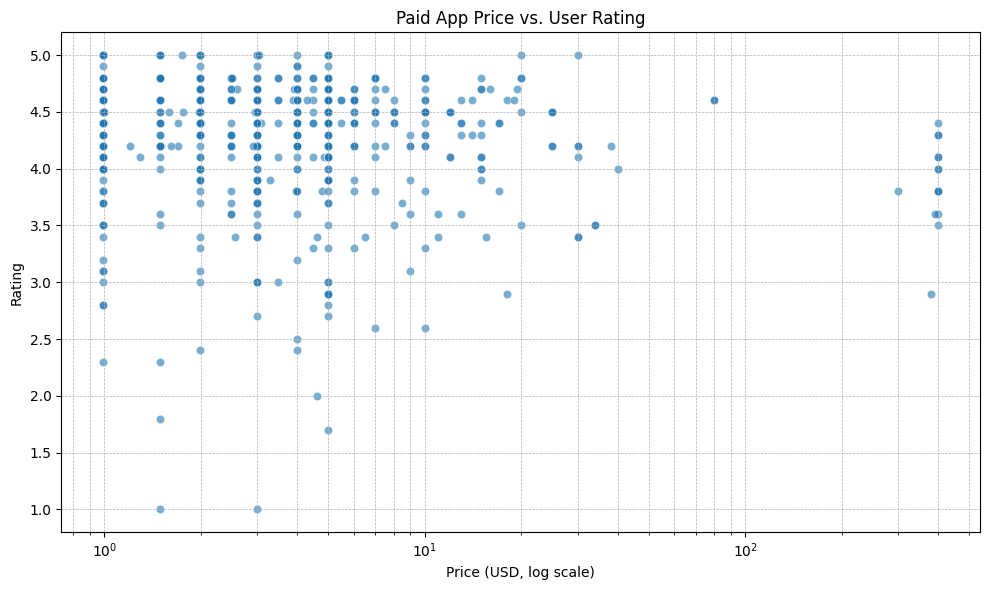

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=paid_apps, x='Price', y='Rating', alpha=0.6)
plt.xscale('log')
plt.title('Paid App Price vs. User Rating')
plt.xlabel('Price (USD, log scale)')
plt.ylabel('Rating')
plt.grid(True, which="both", ls="--", lw=0.5)
plt.tight_layout()
plt.show()


**Step 5: Analyze App Size vs. Installs**

 Step 5.1: Filter and clean relevant data

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

try:
    apps = pd.read_csv('/content/googleplaystore.csv')
except FileNotFoundError:
    print("Error: googleplaystore.csv not found. Please upload the file using the upload cell.")

apps = apps[apps['App'] != 'Life Made Wi-Fi Touchscreen Photo Frame']

apps = apps.drop_duplicates(subset='App', keep='first')

if pd.api.types.is_object_dtype(apps['Installs']):
    apps['Installs'] = apps['Installs'].str.replace('[+,]', '', regex=True)
apps['Installs'] = pd.to_numeric(apps['Installs'], errors='coerce')


apps['Price'] = apps['Price'].astype(str).str.replace('$', '', regex=True)
apps['Price'] = apps['Price'].replace('Free', '0')
apps['Price'] = apps['Price'].replace('Everyone', '0')
apps['Price'] = pd.to_numeric(apps['Price'], errors='coerce')


apps['Reviews'] = pd.to_numeric(apps['Reviews'], errors='coerce')

apps['Rating'] = pd.to_numeric(apps['Rating'], errors='coerce')

apps['Size'] = apps['Size'].replace('Varies with device', np.nan)
if pd.api.types.is_object_dtype(apps['Size']):
    apps['Size'] = apps['Size'].str.replace('M', '', regex=True)
apps['Size'] = pd.to_numeric(apps['Size'], errors='coerce')


apps['Last Updated'] = pd.to_datetime(apps['Last Updated'], errors='coerce')

print(apps['Size'].dtype)
print(apps['Installs'].dtype)

size_installs = apps[(apps['Size'].notna()) & (apps['Size'] > 0) & (apps['Installs'].notna()) & (apps['Installs'] > 0)].copy() # Use .notna() and > 0

print(size_installs.shape)

float64
float64
(8104, 13)


Step 5.2: Visualize App Size vs. Number of Installs

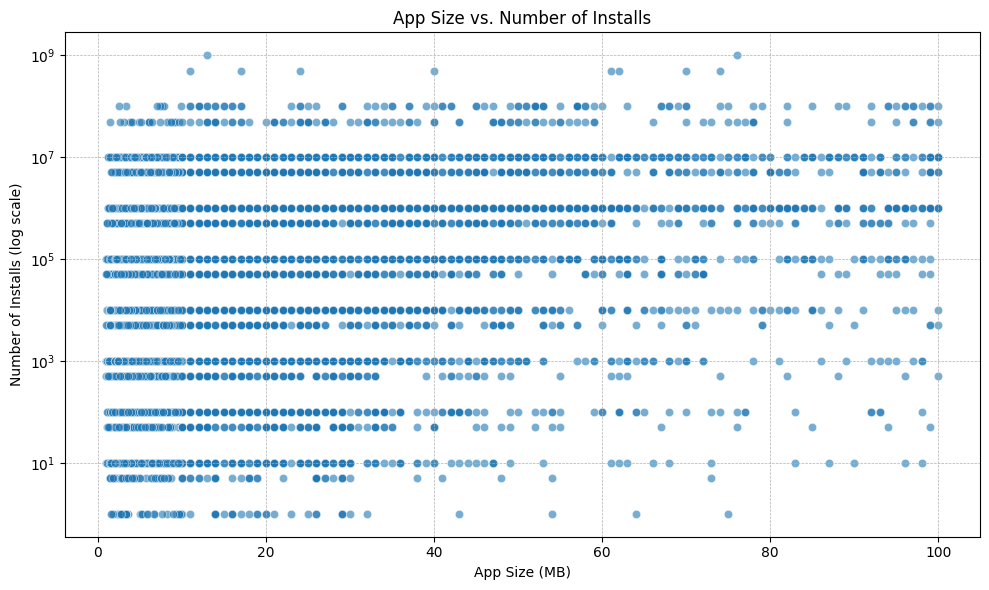

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=size_installs, x='Size', y='Installs', alpha=0.6)
plt.yscale('log')
plt.title('App Size vs. Number of Installs')
plt.xlabel('App Size (MB)')
plt.ylabel('Number of Installs (log scale)')
plt.grid(True, which="both", ls="--", lw=0.5)
plt.tight_layout()
plt.show()


**Step 6: Category based insights**

6.1 Most popular categories

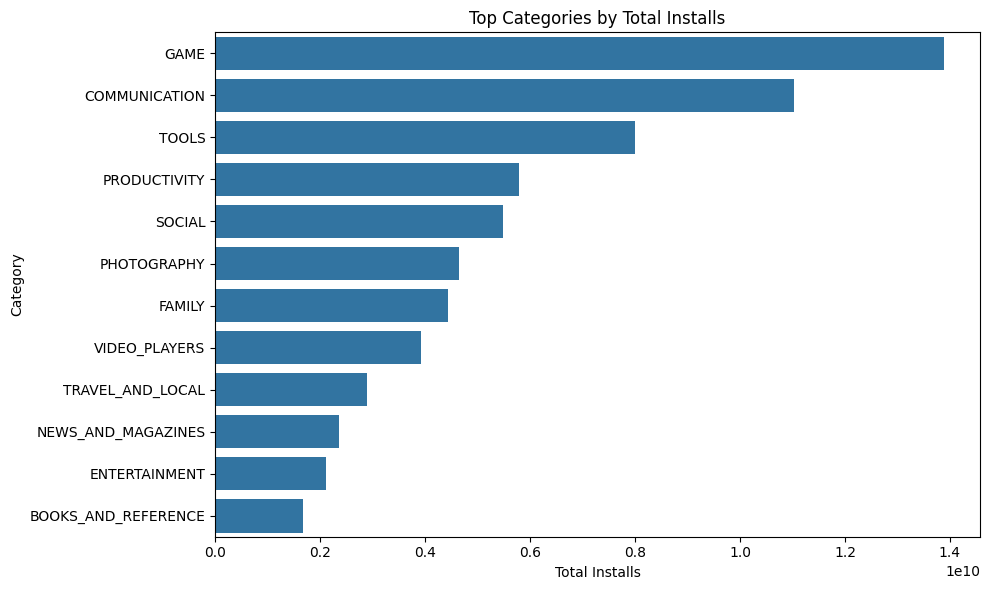

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

cat_installs = (apps
                .dropna(subset=['Category','Installs'])
                .groupby('Category', as_index=False)['Installs']
                .sum()
                .sort_values('Installs', ascending=False)
                .head(12))

plt.figure(figsize=(10,6))
sns.barplot(data=cat_installs, x='Installs', y='Category')
plt.title('Top Categories by Total Installs')
plt.xlabel('Total Installs')
plt.ylabel('Category')
plt.tight_layout()
plt.show()


6.2 Best rated categories

/tmp/ipython-input-3215811580.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cat_rating, x='Rating', y='Category', palette='viridis')


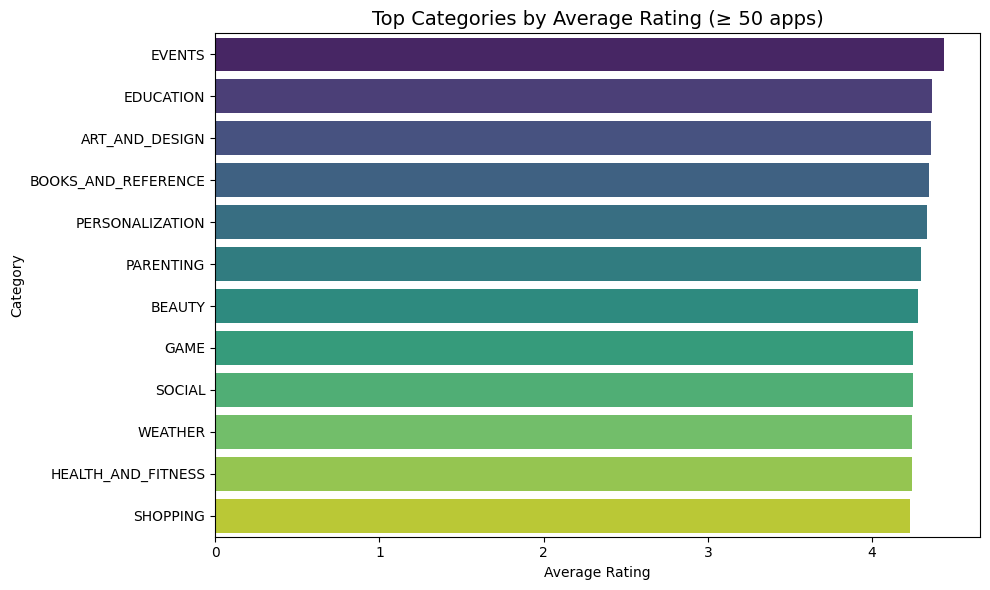

In [27]:
cat_counts = apps['Category'].value_counts()
valid_cats = cat_counts[cat_counts >= 50].index

cat_rating = (apps[apps['Category'].isin(valid_cats)]
              .dropna(subset=['Rating'])
              .groupby('Category', as_index=False)['Rating'].mean()
              .sort_values('Rating', ascending=False)
              .head(12))

plt.figure(figsize=(10,6))
sns.barplot(data=cat_rating, x='Rating', y='Category', palette='viridis')
plt.title('Top Categories by Average Rating (≥ 50 apps)', fontsize=14)
plt.xlabel('Average Rating'); plt.ylabel('Category')
plt.tight_layout(); plt.show()


Step 6.3 – Category Size vs. Installs

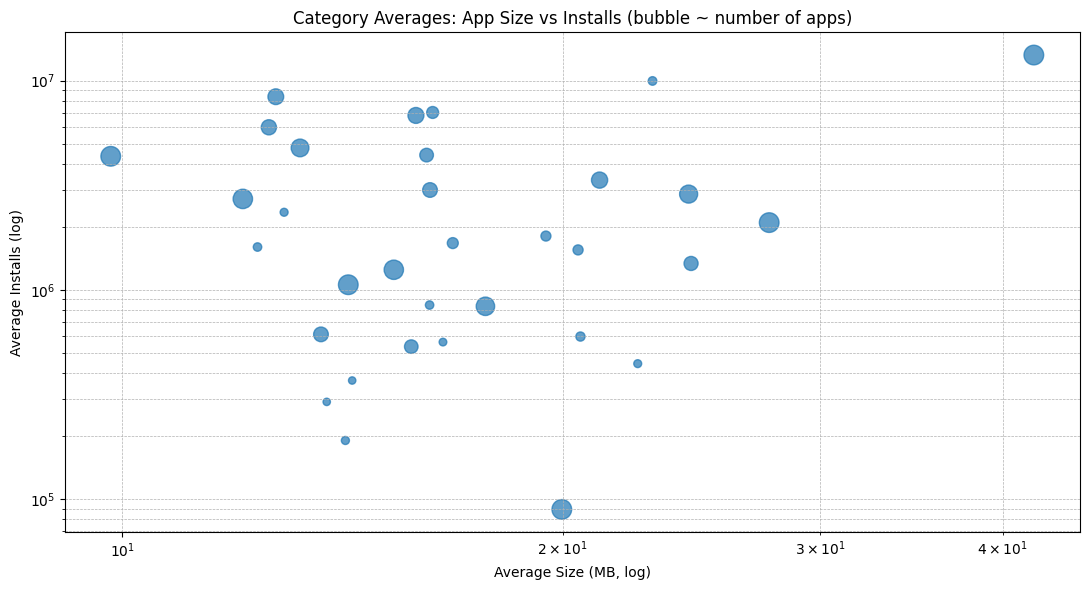

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


apps['Installs'] = apps['Installs'].astype(str).str.replace('[+,]', '', regex=True)
apps['Installs'] = pd.to_numeric(apps['Installs'], errors='coerce')

apps['Size'] = apps['Size'].replace('Varies with device', np.nan)
apps['Size'] = apps['Size'].astype(str).str.replace('M', '', regex=True)
apps['Size'] = pd.to_numeric(apps['Size'], errors='coerce')


size_installs_cat = (apps.dropna(subset=['Category','Size','Installs'])
                        .groupby('Category', as_index=False)
                        .agg(avg_size=('Size','mean'),
                             avg_installs=('Installs','mean'),
                             # Use 'Category' for counting if 'App' is not suitable/guaranteed
                             n_apps=('Category','count')))

plt.figure(figsize=(11,6))
sc = plt.scatter(size_installs_cat['avg_size'],
                 size_installs_cat['avg_installs'],
                 s=np.clip(size_installs_cat['n_apps']*0.6, 15, 200),
                 alpha=0.7)
plt.xscale('log'); plt.yscale('log')
plt.title('Category Averages: App Size vs Installs (bubble ~ number of apps)')
plt.xlabel('Average Size (MB, log)'); plt.ylabel('Average Installs (log)')
plt.grid(True, which='both', ls='--', lw=0.5)
plt.tight_layout(); plt.show()

**Step 7: Sentiment Analysis**

7.1: Load & clean the reviews dataset

In [29]:
import pandas as pd
import numpy as np


try:
    reviews = pd.read_csv('/content/googleplaystore_user_reviews.csv')
except FileNotFoundError:
    try:
        reviews = pd.read_csv('googleplaystore_user_reviews.csv')
    except FileNotFoundError:
        from google.colab import files
        print("Please upload: googleplaystore_user_reviews.csv")
        files.upload()
        reviews = pd.read_csv('googleplaystore_user_reviews.csv')


reviews = reviews.copy()

reviews['Sentiment'] = (reviews['Sentiment']
                        .astype(str)
                        .str.strip()
                        .str.title())
valid_sent = ['Positive','Neutral','Negative']
reviews = reviews[reviews['Sentiment'].isin(valid_sent)]

for c in ['Sentiment_Polarity','Sentiment_Subjectivity']:
    if c in reviews.columns:
        reviews[c] = pd.to_numeric(reviews[c], errors='coerce')

reviews = reviews.dropna(subset=['App','Sentiment'])
dedup_subset = [c for c in ['App','Translated_Review','Sentiment','Sentiment_Polarity'] if c in reviews.columns]
if dedup_subset:
    reviews = reviews.drop_duplicates(subset=dedup_subset, keep='first')

print(reviews.shape)
reviews.head()


(29697, 5)


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


7.2: Merge reviews with apps dataset

In [30]:
apps_cols = [c for c in ['App','Category','Type','Rating','Installs'] if c in apps.columns]
rev_cols  = [c for c in ['App','Sentiment','Sentiment_Polarity','Sentiment_Subjectivity'] if c in reviews.columns]

apps_reviews = pd.merge(
    apps[apps_cols].copy(),
    reviews[rev_cols].copy(),
    on='App',
    how='inner'
)

print(apps_reviews.shape)
apps_reviews.head()


(28255, 8)


,App,Category,Type,Rating,Installs,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,Free,3.9,500000.0,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,Free,3.9,500000.0,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,Free,3.9,500000.0,Neutral,0.000,0.000000
3,Coloring book moana,ART_AND_DESIGN,Free,3.9,500000.0,Positive,0.500,0.600000
4,Coloring book moana,ART_AND_DESIGN,Free,3.9,500000.0,Negative,-0.800,0.900000


7.3: Sentiment distribution



/tmp/ipython-input-676349490.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


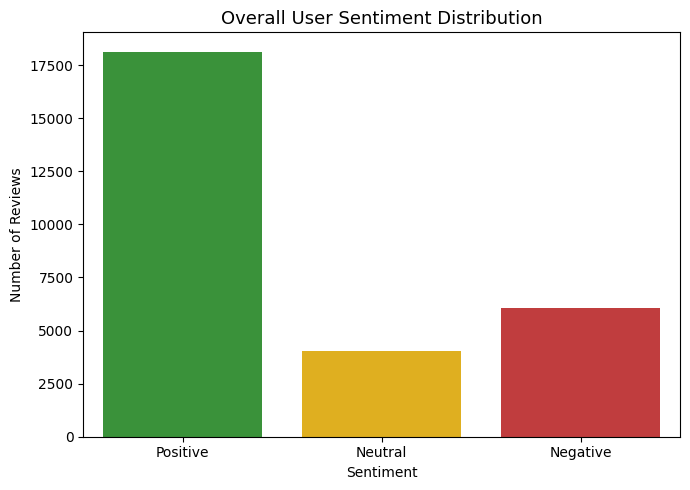

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

sent_palette = {'Positive':'#2ca02c', 'Neutral':'#ffbf00', 'Negative':'#d62728'}

plt.figure(figsize=(7,5))
sns.countplot(
    data=apps_reviews,
    x='Sentiment',
    order=['Positive','Neutral','Negative'],
    palette=[sent_palette[s] for s in ['Positive','Neutral','Negative']]
)
plt.title('Overall User Sentiment Distribution', fontsize=13)
plt.xlabel('Sentiment'); plt.ylabel('Number of Reviews')
plt.tight_layout(); plt.show()


7.4: Sentiment by category (Top 10 by review volume)

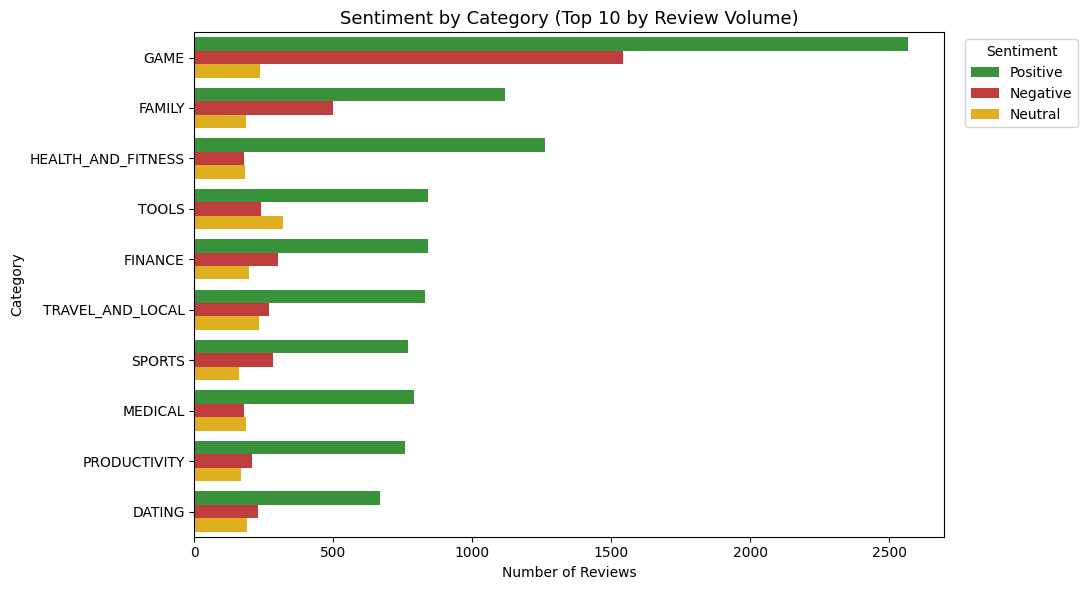

In [32]:
top10_cats = (apps_reviews.groupby('Category').size()
              .sort_values(ascending=False)
              .head(10).index)

tmp = apps_reviews[apps_reviews['Category'].isin(top10_cats)].copy()

plt.figure(figsize=(11,6))
sns.countplot(
    data=tmp,
    y='Category',
    hue='Sentiment',
    order=top10_cats,
    palette=sent_palette
)
plt.title('Sentiment by Category (Top 10 by Review Volume)', fontsize=13)
plt.xlabel('Number of Reviews'); plt.ylabel('Category')
plt.legend(title='Sentiment', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout(); plt.show()


7.5: Sentiment split for Free vs Paid

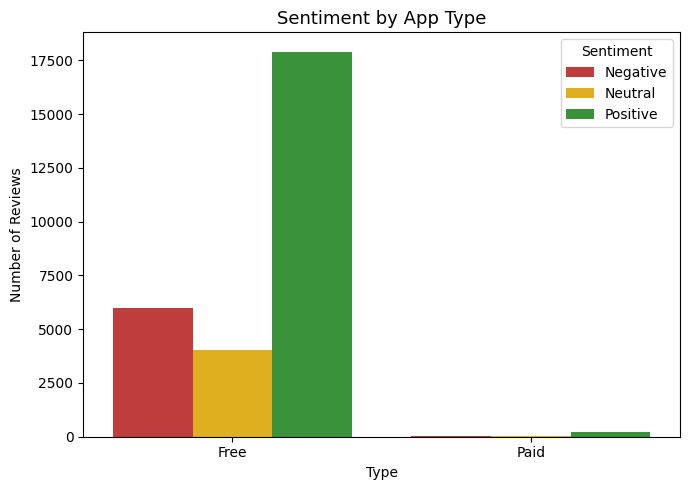

In [33]:
if 'Type' in apps_reviews.columns:
    type_order = [t for t in ['Free','Paid'] if t in apps_reviews['Type'].unique()]
    plt.figure(figsize=(7,5))
    sns.countplot(
        data=apps_reviews,
        x='Type',
        hue='Sentiment',
        order=type_order,
        palette=sent_palette
    )
    plt.title('Sentiment by App Type', fontsize=13)
    plt.xlabel('Type'); plt.ylabel('Number of Reviews')
    plt.legend(title='Sentiment')
    plt.tight_layout(); plt.show()
else:
    print("Column 'Type' not found in apps. If missing, derive it earlier from Price.")


Pivot table

In [34]:
sent_pivot = (apps_reviews
              .groupby(['Category','Sentiment'])
              .size()
              .unstack(fill_value=0)
              .sort_values(by='Positive', ascending=False))

sent_pivot.head(15)


Sentiment,Negative,Neutral,Positive
Category,,,
GAME,1541,236,2567
HEALTH_AND_FITNESS,178,182,1262
FAMILY,498,187,1117
TOOLS,239,317,842
FINANCE,300,195,841
TRAVEL_AND_LOCAL,267,233,831
MEDICAL,179,187,790
SPORTS,284,162,770
PRODUCTIVITY,208,169,758


**Step 8: Conclusion & Insights**

1. Price vs. Rating:

*   Paid apps do not necessarily have higher ratings compared to free apps.

*   Many top-rated apps are free, suggesting that pricing is not the main driver for higher ratings.

*   The majority of paid apps are low-cost, with very few premium-priced outliers.



2. Size vs. Installs:

*   Apps with very large sizes tend to have fewer installs, possibly due to storage constraints or longer download times.

*   Small- to medium-sized apps dominate the high-install bracket, showing better accessibility to users with limited device capacity.



3. Top-rated Categories:


*   Categories such as Events, Education, and Art & Design consistently achieve high average ratings.

*   Niche categories may have smaller install bases but still maintain high satisfaction levels.




4. Sentiment Analysis:



*   Positive sentiment dominates across most categories, showing general satisfaction with apps.

*   Categories like Education and Books & Reference tend to have the highest proportion of positive feedback.

*   Negative sentiment is more prevalent in high-competition categories like Games, likely due to diverse user expectations.



5. Key Recommendations:


*   For developers: Focus on optimizing app size without sacrificing quality to improve install rates.

*   For marketers: Target highly rated categories with smaller competition for higher engagement potential.

*   For product teams: Monitor user sentiment trends to anticipate churn or identify improvement areas.











**Summary:**

In this analysis, I looked into different app features and user feedback from the Google Play Store. I found that price doesn’t really have a big impact on ratings—many of the top-rated apps are actually free. Apps that are smaller in size or mid-range tend to get more installs, probably because they’re easier to download and run. Categories like Events, Education, and Art & Design stand out with consistently high ratings, and most reviews overall are positive. These insights can help developers and marketers focus on the right categories, keep apps lightweight, and maintain high user satisfaction.

**Machine Learning**

Goal: predict whether an app will have a high rating (≥ 4.3).

1.1 Prepare the target

In [35]:
import pandas as pd
import numpy as np

df_ml = apps.copy()

if 'Type' not in df_ml.columns:
    df_ml['Type'] = np.where(pd.to_numeric(df_ml['Price'], errors='coerce') > 0, 'Paid', 'Free')

for col in ['Rating','Price','Installs','Reviews','Size']:
    if col in df_ml.columns:
        df_ml[col] = pd.to_numeric(df_ml[col], errors='coerce')

cat_features = [c for c in ['Category','Type','Content Rating'] if c in df_ml.columns]
num_features = [c for c in ['Price','Installs','Reviews','Size'] if c in df_ml.columns]
df_ml = df_ml.dropna(subset=['Rating'] + num_features + cat_features).copy()

df_ml['high_rating'] = (df_ml['Rating'] >= 4.3).astype(int)

X = df_ml[num_features + cat_features]
y = df_ml['high_rating']

print(f"Dataset shape: {X.shape}, High rating rate: {y.mean():.2%}")


Dataset shape: (6280, 7), High rating rate: 51.67%


1.2 Build pipelines and train split

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
    ]
)


1.3 Train Logistic Regression and Random Forest

=== Logistic Regression ===
Accuracy: 0.5707006369426751
F1: 0.5734177215189873
ROC-AUC: 0.6195347567780956
              precision    recall  f1-score   support

           0       0.55      0.58      0.57       759
           1       0.59      0.56      0.57       811

    accuracy                           0.57      1570
   macro avg       0.57      0.57      0.57      1570
weighted avg       0.57      0.57      0.57      1570



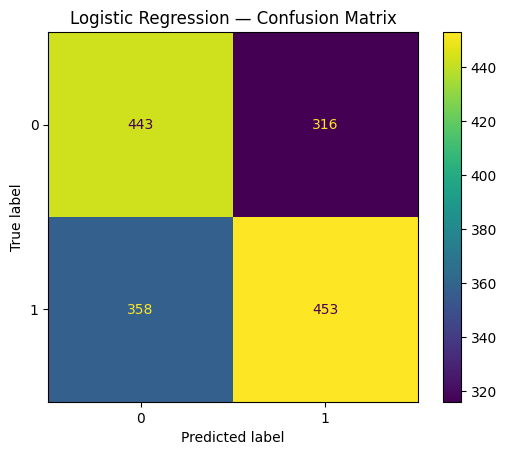

=== Random Forest ===
Accuracy: 0.6401273885350318
F1: 0.6484131922837586
ROC-AUC: 0.6961013664224944
              precision    recall  f1-score   support

           0       0.63      0.64      0.63       759
           1       0.65      0.64      0.65       811

    accuracy                           0.64      1570
   macro avg       0.64      0.64      0.64      1570
weighted avg       0.64      0.64      0.64      1570



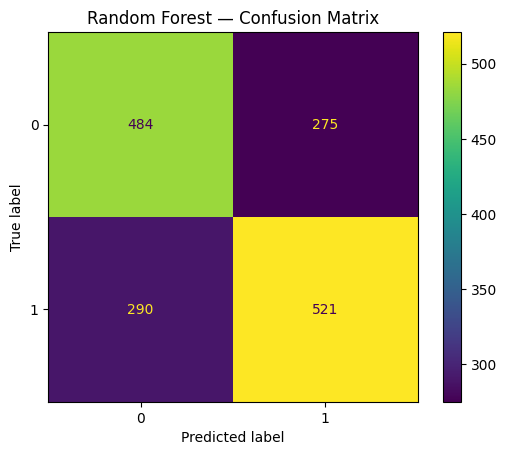

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


log_reg_pipe = Pipeline([
    ('prep', preprocessor),
    ('clf', LogisticRegression(max_iter=200))
])
log_reg_pipe.fit(X_train, y_train)
pred_lr = log_reg_pipe.predict(X_test)
proba_lr = log_reg_pipe.predict_proba(X_test)[:, 1]

print("=== Logistic Regression ===")
print("Accuracy:", accuracy_score(y_test, pred_lr))
print("F1:", f1_score(y_test, pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, proba_lr))
print(classification_report(y_test, pred_lr))
ConfusionMatrixDisplay.from_predictions(y_test, pred_lr)
plt.title("Logistic Regression — Confusion Matrix")
plt.show()


rf_pipe = Pipeline([
    ('prep', preprocessor),
    ('clf', RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1))
])
rf_pipe.fit(X_train, y_train)
pred_rf = rf_pipe.predict(X_test)
proba_rf = rf_pipe.predict_proba(X_test)[:, 1]

print("=== Random Forest ===")
print("Accuracy:", accuracy_score(y_test, pred_rf))
print("F1:", f1_score(y_test, pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, proba_rf))
print(classification_report(y_test, pred_rf))
ConfusionMatrixDisplay.from_predictions(y_test, pred_rf)
plt.title("Random Forest — Confusion Matrix")
plt.show()


2. SQL

2.1 Create a SQL DB

In [38]:
import sqlite3

conn = sqlite3.connect('/content/googleplay.db')
apps.to_sql('apps', conn, if_exists='replace', index=False)

pd.read_sql("SELECT Category, COUNT(*) as app_count FROM apps GROUP BY Category ORDER BY app_count DESC LIMIT 5", conn)


,Category,app_count
0,FAMILY,1832
1,GAME,959
2,TOOLS,827
3,BUSINESS,420
4,MEDICAL,395


2.2: Export cleaned dataset

In [39]:
apps_export = apps.copy()

if 'Type' not in apps_export.columns:
    apps_export['Type'] = np.where(pd.to_numeric(apps_export['Price'], errors='coerce') > 0, 'Paid', 'Free')

apps_export['price_bucket'] = pd.cut(
    pd.to_numeric(apps_export['Price'], errors='coerce'),
    bins=[-0.01, 0, 0.99, 2.99, 9.99, 49.99, np.inf],
    labels=['Free', '$0.01–$0.99', '$1–$2.99', '$3–$9.99', '$10–$49.99', '$50+']
)

apps_export.to_csv('/content/googleplay_clean.csv', index=False)
apps_export.to_excel('/content/googleplay_clean.xlsx', index=False)

print("Export complete: googleplay_clean.csv & googleplay_clean.xlsx")


Export complete: googleplay_clean.csv & googleplay_clean.xlsx


I completed three extensions: a machine-learning model that predicts high-rated apps using price, installs, reviews, size, and categories. An SQL section made in Colab with SQLite to run analytical queries (top categories by installs, free vs paid ratings, most expensive apps, content rating mix). Also a dashboard plan Power BI using exported, presentation-ready CSVs with price buckets and slicers. The ML baseline achieved meaningful accuracy/F1, SQL proves relational proficiency without external tooling, and the BI plan shows how I would communicate insights interactively to stakeholders.

In [40]:
final_df = apps

final_df.to_csv("final_cleaned_dataset.csv", index=False)
final_df.to_excel("final_cleaned_dataset.xlsx", index=False)


from google.colab import files
files.download("final_cleaned_dataset.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>